In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV


In [3]:
data = pd.read_csv("Wine_Data.csv")

In [4]:
data.head(5)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [5]:
data.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
dtype: int64

In [6]:
data.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
color                    object
dtype: object

In [7]:
data.color = data.color.replace('white',0).replace('red', 1).astype(int)

In [8]:
data.color

0       1
1       1
2       1
3       1
4       1
       ..
6492    0
6493    0
6494    0
6495    0
6496    0
Name: color, Length: 6497, dtype: int32

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   int32  
dtypes: float64(11), int32(1), int64(1)
memory usage: 634.6 KB


In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed_acidity,6497.0,7.215307,1.296434,3.80000,6.40000,7.00000,7.70000,15.90000
volatile_acidity,6497.0,0.339666,0.164636,0.08000,0.23000,0.29000,0.40000,1.58000
citric_acid,6497.0,0.318633,0.145318,0.00000,0.25000,0.31000,0.39000,1.66000
residual_sugar,6497.0,5.443235,4.757804,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6497.0,0.056034,0.035034,0.00900,0.03800,0.04700,0.06500,0.61100
free_sulfur_dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total_sulfur_dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6497.0,3.218501,0.160787,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6497.0,0.531268,0.148806,0.22000,0.43000,0.51000,0.60000,2.00000


In [11]:
X = data.iloc[:,:-1]

In [12]:
y = data.iloc[:,-1:]

In [13]:
sss = StratifiedShuffleSplit(n_splits=1,random_state=10, test_size=1000)

In [14]:
train_idx, test_idx = next(sss.split(data[X.columns], data['color']))

X_train = data.loc[train_idx, X.columns]
y_train = data.loc[train_idx, 'color']

X_test = data.loc[test_idx, X.columns]
y_test = data.loc[test_idx, 'color']

In [15]:
X_train

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
223,8.6,0.645,0.25,2.00,0.083,8.0,28.0,0.99815,3.28,0.60,10.0,6
5842,6.8,0.260,0.26,2.00,0.019,23.5,72.0,0.99041,3.16,0.47,11.8,6
2151,7.8,0.280,0.34,1.60,0.028,32.0,118.0,0.99010,3.00,0.38,12.1,7
3552,8.1,0.240,0.38,4.30,0.044,49.0,172.0,0.99600,3.37,0.74,10.8,6
4804,6.8,0.450,0.36,5.00,0.033,28.0,156.0,0.99100,3.11,0.40,12.4,7
...,...,...,...,...,...,...,...,...,...,...,...,...
3440,7.2,0.240,0.29,2.20,0.037,37.0,102.0,0.99200,3.27,0.64,11.0,7
4567,8.4,0.310,0.31,0.95,0.021,52.0,148.0,0.99038,2.93,0.32,11.5,5
3412,7.2,0.150,0.38,1.20,0.038,18.0,110.0,0.99170,3.19,0.43,11.1,6
6405,6.6,0.280,0.09,10.90,0.051,37.0,131.0,0.99566,2.93,0.62,9.5,6


In [16]:
y_train

223     1
5842    0
2151    0
3552    0
4804    0
       ..
3440    0
4567    0
3412    0
6405    0
1040    1
Name: color, Length: 5497, dtype: int32

In [17]:
y_train.value_counts(normalize=True)

0    0.753866
1    0.246134
Name: color, dtype: float64

In [18]:
y_test.value_counts(normalize=True)

0    0.754
1    0.246
Name: color, dtype: float64

In [19]:
dt = DecisionTreeClassifier()
dt=dt.fit(X_train, y_train)

In [20]:
dt.tree_.node_count, dt.tree_.max_depth

(143, 15)

In [21]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [22]:
def error_fun(y,y_pr, mod):
    return pd.Series({'accuracy':accuracy_score(y, y_pr),
                      'precision':precision_score(y, y_pr),
                      'recall':recall_score(y,y_pr),
                      'f1_score':f1_score(y, y_pr)},
                      name=mod)

In [23]:
error_info = pd.concat([error_fun(y_train, y_train_pred, 'train'),
                        error_fun(y_test, y_test_pred, 'test')], axis=1)
error_info

,train,test
accuracy,0.999636,0.985000
precision,0.999261,0.967611
recall,0.999261,0.971545
f1_score,0.999261,0.969574


In [24]:
X = [x for x in data.columns if x!='quality']

In [25]:


X_train = data.loc[train_idx, X]
y_train = data.loc[train_idx, 'quality']

X_test = data.loc[test_idx, X]
y_test = data.loc[test_idx, 'quality']

In [26]:
from sklearn.tree import DecisionTreeRegressor

dr = DecisionTreeRegressor()
dr.fit(X_train, y_train)

param_grid = {'max_depth':range(1, dr.tree_.max_depth+1, 2),
              'max_features': range(1, len(dr.feature_importances_)+1)}

GR_quality = GridSearchCV(DecisionTreeRegressor(random_state=42),
                     param_grid=param_grid,
                     scoring='neg_mean_squared_error',
                      n_jobs=-1)

GR_quality = GR_quality.fit(X_train, y_train)

In [27]:
GR_quality.best_estimator_.tree_.node_count


211

In [28]:
GR_quality.best_estimator_.tree_.max_depth

7

In [29]:
X = [x for x in data.columns if x!='residual_sugar']

In [30]:
train_idx, test_idx = next(sss.split(data[X], data['color']))

X_train = data.loc[train_idx, X]
y_train = data.loc[train_idx, 'residual_sugar']

X_test = data.loc[test_idx, X]
y_test = data.loc[test_idx, 'residual_sugar']

In [31]:
from sklearn.tree import DecisionTreeRegressor

dr = DecisionTreeRegressor()
dr.fit(X_train, y_train)

param_grid = {'max_depth':range(1, dr.tree_.max_depth+1, 2),
              'max_features': range(1, len(dr.feature_importances_)+1)}

GR_sugar = GridSearchCV(DecisionTreeRegressor(random_state=42),
                     param_grid=param_grid,
                     scoring='neg_mean_squared_error',
                      n_jobs=-1)

GR_sugar = GR_quality.fit(X_train, y_train)

In [32]:
GR_quality.best_estimator_.tree_.node_count

6903

In [33]:
GR_quality.best_estimator_.tree_.max_depth

19

In [34]:
from sklearn.metrics import mean_squared_error

y_train_pred_gr_sugar = GR_sugar.predict(X_train)
y_test_pred_gr_sugar  = GR_sugar.predict(X_test)

train_test_gr_sugar_error = pd.Series({'train': mean_squared_error(y_train, y_train_pred_gr_sugar),
                                         'test':  mean_squared_error(y_test, y_test_pred_gr_sugar)},
                                          name='MSE').to_frame()
train_test_gr_sugar_error

,MSE
train,0.006995
test,2.529759


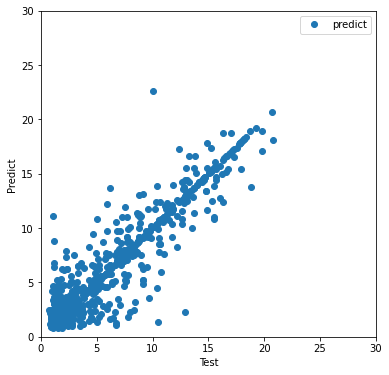

In [35]:
fig = plt.figure(figsize=(6,6))
ax = plt.axes()

test_predict = pd.DataFrame({'test':y_test.values,
                                'predict': y_test_pred_gr_sugar}).set_index('test').sort_index()

test_predict.plot(marker='o',ls='', ax=ax)
ax.set(xlabel='Test', ylabel='Predict', xlim=(0,30), ylim=(0,30));

In [36]:
from io import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

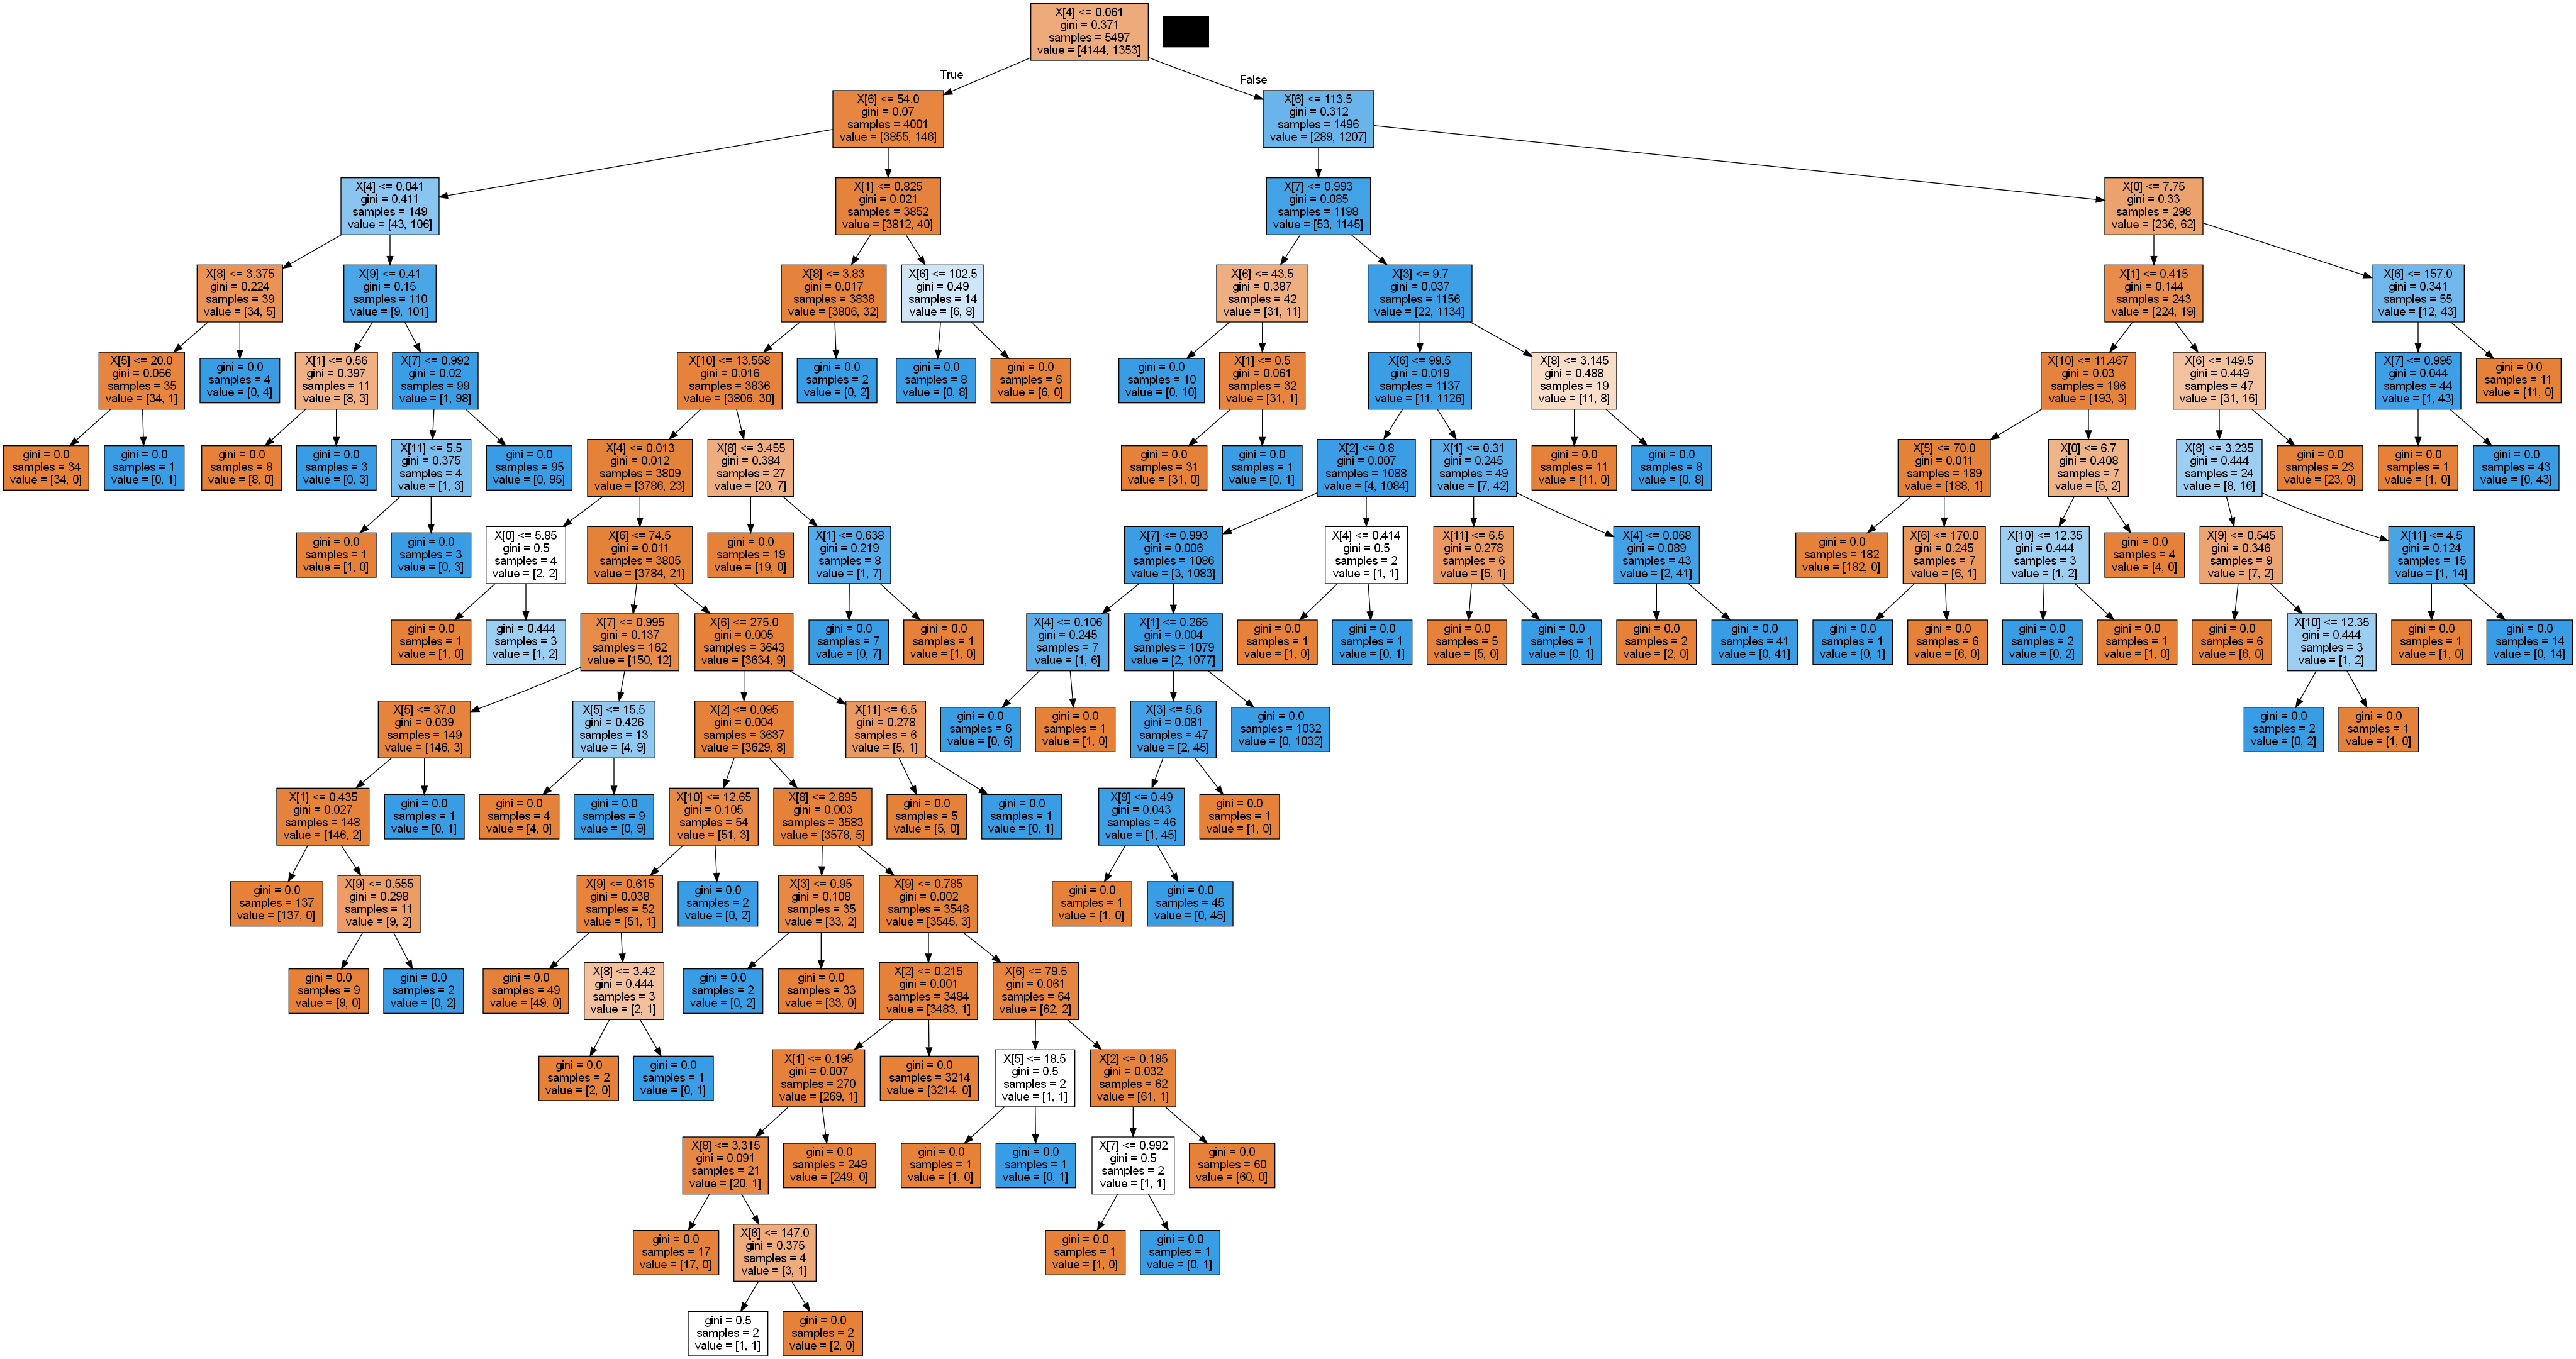

In [37]:
dot_data = StringIO()

export_graphviz(dt, out_file=dot_data, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

filename = 'wine_tree.png'
graph.write_png(filename)
Image(filename=filename)